# Imports

In [1]:
import numpy as np
import pandas as pd

from collections import Counter

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from nltk.probability import FreqDist

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('ticks')

from wordcloud import WordCloud

In [27]:
pd.set_option('max_colwidth', 250)

In [28]:
df = pd.read_csv('5k_Datasets/5k_tweets_lda_10.csv', index_col=0)
df.shape

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 32)

In [29]:
df['date'] = pd.to_datetime(df['date'])

# Sentiment EDA

In [6]:
df.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'tweet', 'hashtags',
       'user_id', 'username', 'name', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'retweet_id', 'reply_to', 'sentiment_score',
       'sentiment'],
      dtype='object')

In [7]:
# Proportion of sentiments by day
df.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

sentiment,negative,neutral,positive
date,,,
2020-01-01,0.692308,0.054945,0.252747
2020-01-02,0.566879,0.089172,0.343949
2020-01-03,0.602564,0.108974,0.288462
2020-01-04,0.587097,0.083871,0.329032
2020-01-05,0.500000,0.097701,0.402299
...,...,...,...
2020-05-27,0.425400,0.180400,0.394200
2020-05-28,0.421400,0.177800,0.400800
2020-05-29,0.395200,0.148600,0.456200


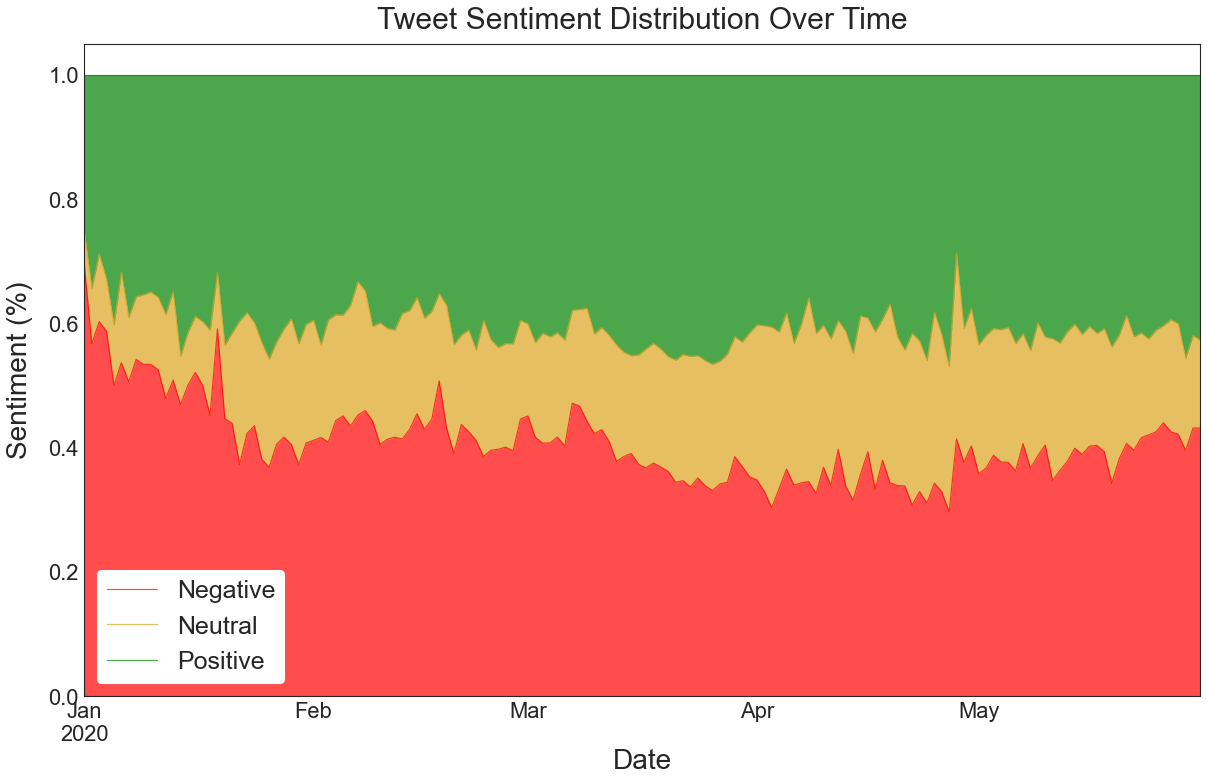

In [83]:
# Proportion of sentiments by day
sent_by_day = df.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = sent_by_day.plot.area(stacked = True, figsize=(20,12),
                           color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Tweet Sentiment Distribution Over Time', fontsize=30, pad=15)
p1.set_xlabel('Date', fontsize=28)
p1.set_ylabel('Sentiment (%)', fontsize=28, labelpad=15)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1, fontsize=25)
plt.setp(p1.get_xticklabels(), fontsize=22)
plt.setp(p1.get_yticklabels(), fontsize=22);

# plt.savefig('Images/sentiment_stacked_line.png', dpi = 100)
# plt.show()

In [9]:
# Create dataframe of top twenty tweets per day by likes
top_20_by_day = []
for i in df.groupby('date')['nlikes'].nlargest(20).index:
    top_20_by_day.append(i[1])
    
top_20_by_day = df.loc[top_20_by_day]
top_20_by_day.shape

(3040, 19)

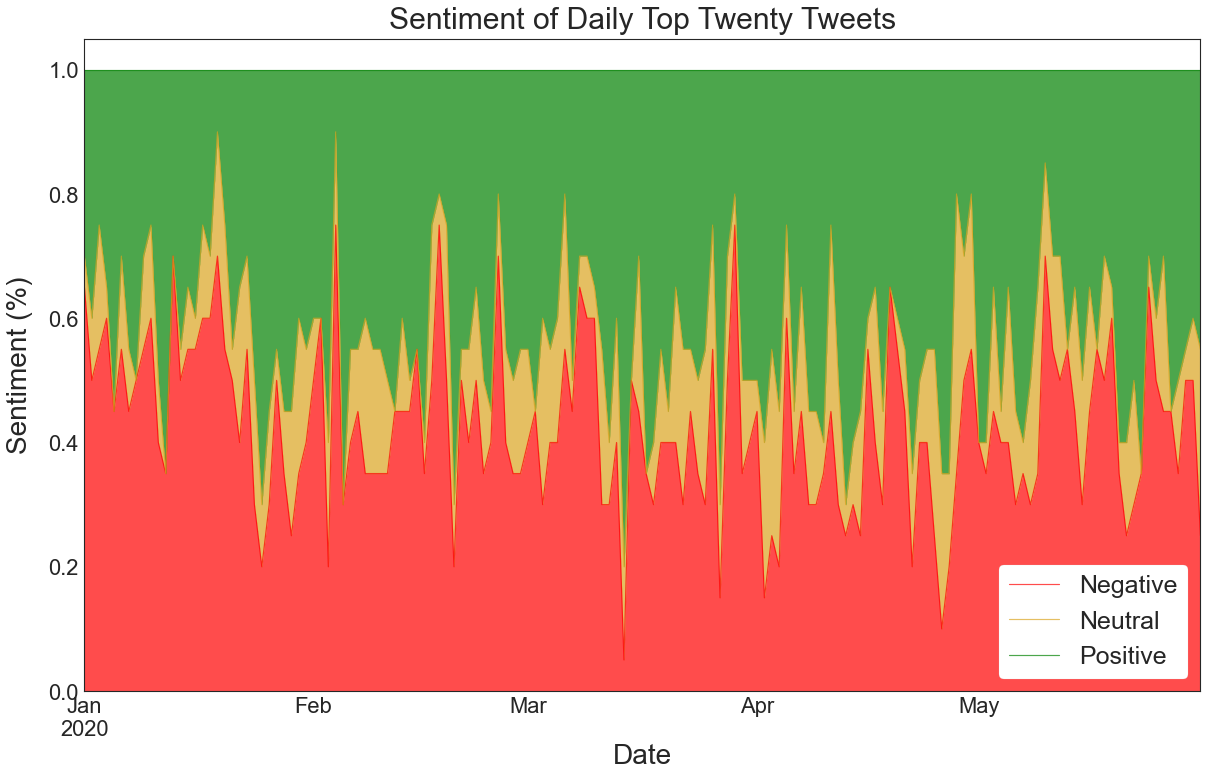

In [84]:
# Proportion of sentiments of top twenty tweets by day
sent_top_20_by_day = top_20_by_day.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = sent_top_20_by_day.plot.area(stacked = True, figsize=(20,12),
                           color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment of Daily Top Twenty Tweets', fontsize=30, pad=10)
p1.set_xlabel('Date', fontsize=28)
p1.set_ylabel('Sentiment (%)', fontsize=28, labelpad=15)
plt.setp(p1.get_xticklabels(), fontsize=22)
plt.setp(p1.get_yticklabels(), fontsize=22)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1, fontsize=25)

# p1.show()

In [58]:
# Create dataframes for positive, neutral and negative sentiment
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']
negative_df = df[df['sentiment'] == 'negative']

positive_df.shape, neutral_df.shape, negative_df.shape

((239200, 32), (115386, 32), (221363, 32))

Text(0, 0.5, 'Sentiment')

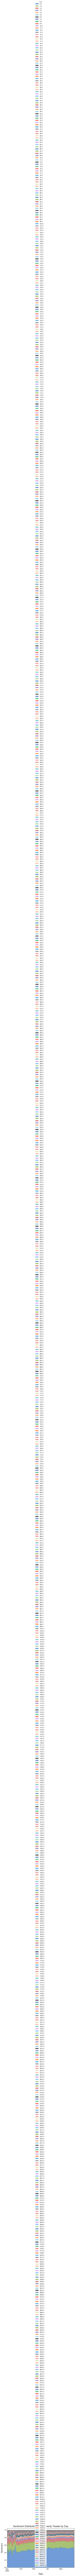

In [133]:
# Proportion of sentiments of top twenty tweets by day
positive_likes = positive_df.groupby('date')['nlikes'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = positive_likes.plot.area(stacked = True, figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Sentiment Distribution of Top Twenty Tweets by Day', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
# p1.show()

In [67]:
df['sentiment'].value_counts()

positive    239200
negative    221363
neutral     115386
Name: sentiment, dtype: int64

In [60]:
df['lda'].value_counts()

8    143873
6    117378
7     77650
1     64266
0     54469
4     29193
5     27397
9     23454
2     20047
3     18222
Name: lda, dtype: int64

In [61]:
negative_df['lda'].value_counts()

8    66055
6    47078
7    29527
0    20780
1    19654
5     9591
4     7656
3     7424
9     7032
2     6566
Name: lda, dtype: int64

In [62]:
neutral_df['lda'].value_counts()

6    26023
8    21526
0    13322
7    11345
4     8840
9     8593
1     8402
5     6023
2     5943
3     5369
Name: lda, dtype: int64

In [63]:
positive_df['lda'].value_counts()

8    56292
6    44277
7    36778
1    36210
0    20367
4    12697
5    11783
9     7829
2     7538
3     5429
Name: lda, dtype: int64

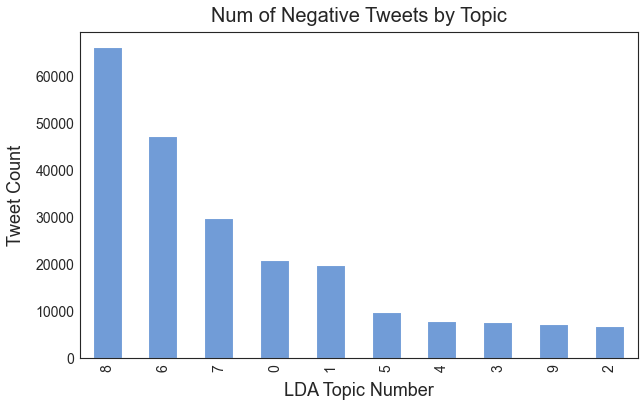

In [88]:
p1 = negative_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Negative Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

# plt.savefig('Images/tweet_count_by_topic_neg.png', dpi = 100)

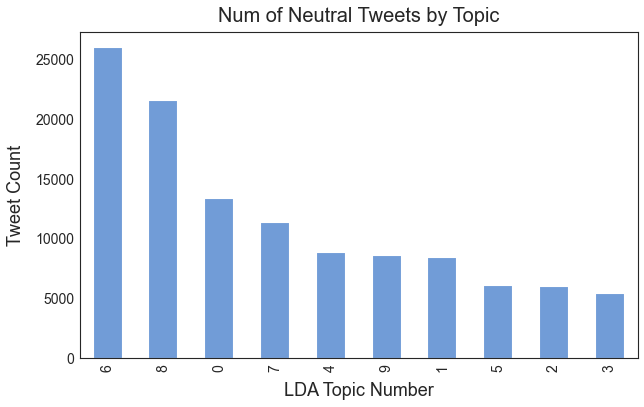

In [89]:
p1 = neutral_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Neutral Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

# plt.savefig('Images/tweet_count_by_topic_neu.png', dpi = 100)

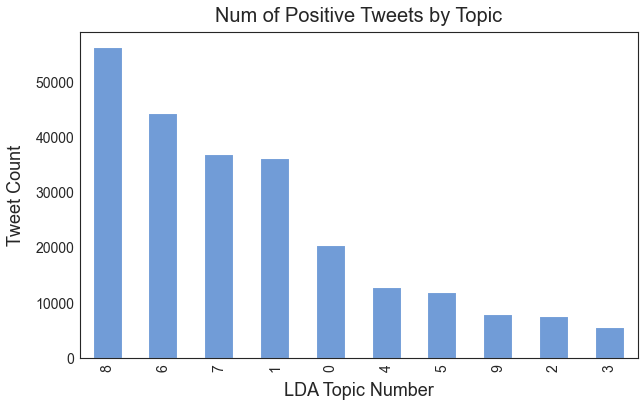

In [90]:
p1 = positive_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Positive Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

# plt.savefig('Images/tweet_count_by_topic_pos.png', dpi = 100)

# Sentiment of Health Expert Tweets

In [2]:
analyser = SentimentIntensityAnalyzer()

In [3]:
analyser.polarity_scores('Seriously people- STOP BUYING MASKS! They are NOT effective in preventing general public from catching #Coronavirus, but if healthcare providers can’t get them to care for sick patients, it puts them and our communities at risk!')

{'neg': 0.271, 'neu': 0.616, 'pos': 0.113, 'compound': -0.7536}

In [4]:
analyser.polarity_scores('For most people over the age of 2, wearing a mask is completely safe. As an anesthesiologist, I wear a mask all day long to protect my patients in the operating room. Here are some tips on who should wear one, and how to wear it properly!')

{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.7257}

In [5]:
analyser.polarity_scores("As our communities reopen, wearing a face covering is something we all can - and should - do to protect each other. So no matter how you're spending #MemorialDayWeekend, wear a face covering when out in public. Comment w/ a selfie & encourage others to do so too")

{'neg': 0.026, 'neu': 0.836, 'pos': 0.138, 'compound': 0.7108}

In [75]:
analyser.polarity_scores('CDC does not currently recommend the use of facemasks to help prevent novel #coronavirus. Take everyday preventive actions, like staying home when you are sick and washing hands with soap and water, to help slow the spread of respiratory illness.')

{'neg': 0.158, 'neu': 0.622, 'pos': 0.22, 'compound': 0.2937}

In [76]:
analyser.polarity_scores('Prevent the spread of #COVID19 in your home. If possible, have sick household member: stay in a separate room, use a separate bathroom, wear a facemask when around others (within the home, in a vehicle, or doctor’s office)')

{'neg': 0.082, 'neu': 0.891, 'pos': 0.027, 'compound': -0.4939}

# Word Count EDA

In [97]:
# Load cleaned tweets
clean_tweets = pd.read_pickle('Datasets/clean_tweets_v2.pkl')
clean_tweets.shape

(575949,)

In [110]:
# Join all cleaned tweets into one string
big_string = ' '.join(clean_tweets)
big_string[:1000]

'death thomas unknown peasant died river ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck joke #ccpchina come epidemic outbreakthink stayed silent #sars dear worldstay away #hk im sure infected amongst already dear fellow #hkers facewithmedicalmask least thought death gave horn freak interesting cult death thinkingface electronically posing cia brennan chief facewithmonocle see doctor stuff war increased quality medical care hospital start admitting patient chemical attack doctor rush spot give interview photo ops saving many life winkingface plague doctorgas combination sicknesspoison stuff good combination especially coming thought cost nothing prayer half unlike cost firefighting equipment hose truck aircraft least thought throwing prayer threaten precious surplus thought prayer bring back dead understand killed mine miraceibel rosa death counted mining fatality record keeping death linked industry feel scene phil another pointles

In [108]:
# Split string into all words in clean tweets
all_words = big_string.split()
len(all_words)

7793391

In [114]:
# Create dictionary of word counts
fdist = FreqDist(all_words)
fdist

FreqDist({'hand': 40134, 'need': 39383, 'spread': 33418, 'protect': 32088, 'make': 31605, 'help': 30306, 'say': 28477, 'glove': 27649, 'public': 25717, 'hospital': 25525, ...})

In [118]:
# Convert word counts to dataframe
fdist_df = pd.DataFrame(data=fdist.values(), index=fdist.keys(), columns=['word_count'])
fdist_df = fdist_df.sort_values('word_count', ascending=False)

In [146]:
# Top 25 most frequent words in cleaned tweets
top_25 = fdist_df.iloc[:25,:]
top_25

,word_count
hand,40134
need,39383
spread,33418
protect,32088
make,31605
help,30306
say,28477
glove,27649
public,25717
hospital,25525


<BarContainer object of 25 artists>

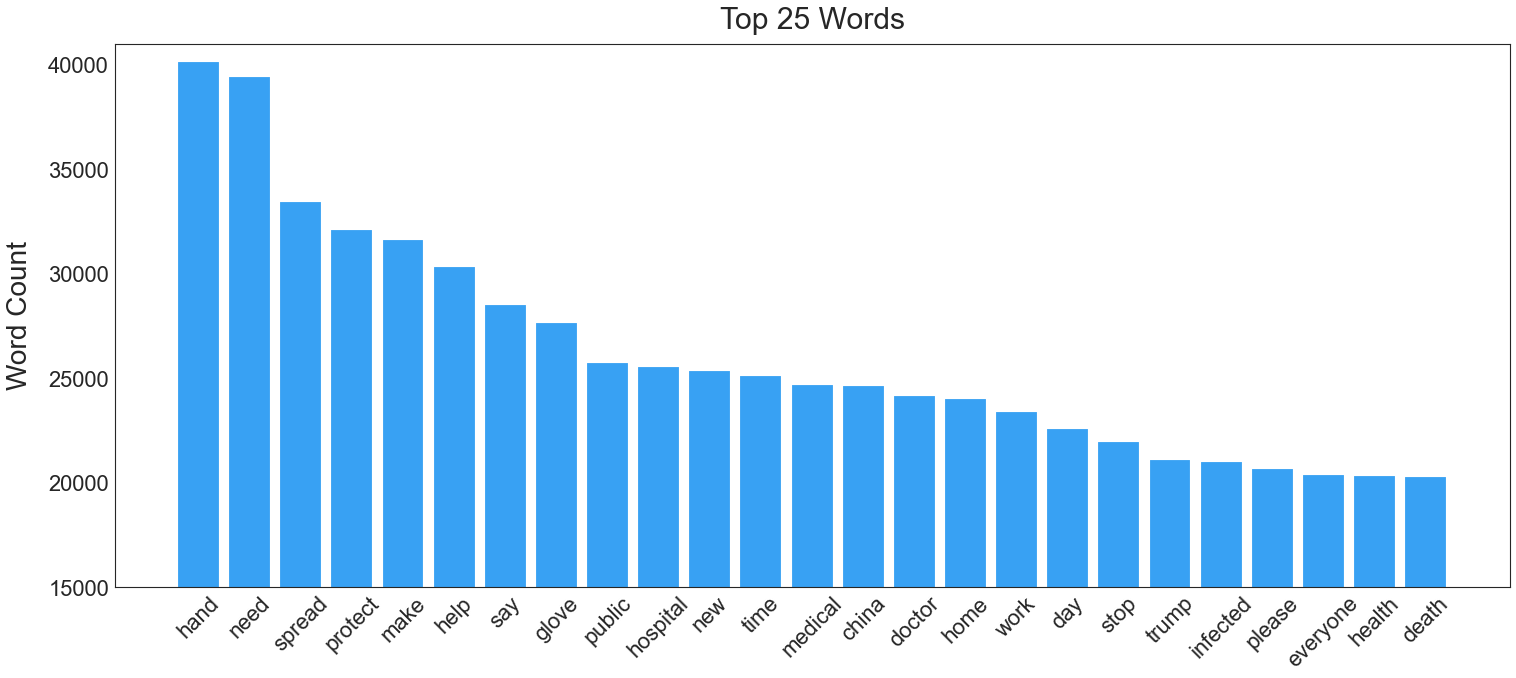

In [120]:
plt.figure(figsize=(25,10))
plt.title('Top 25 Words', fontsize=30, pad=15)
plt.ylabel('Word Count', fontsize=28, labelpad=15)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(bottom=15000, top=41000)

plt.bar(top_25.index, top_25.word_count, color='#38A1F3')

# plt.savefig('Images/top_25_words.png', dpi = 100)

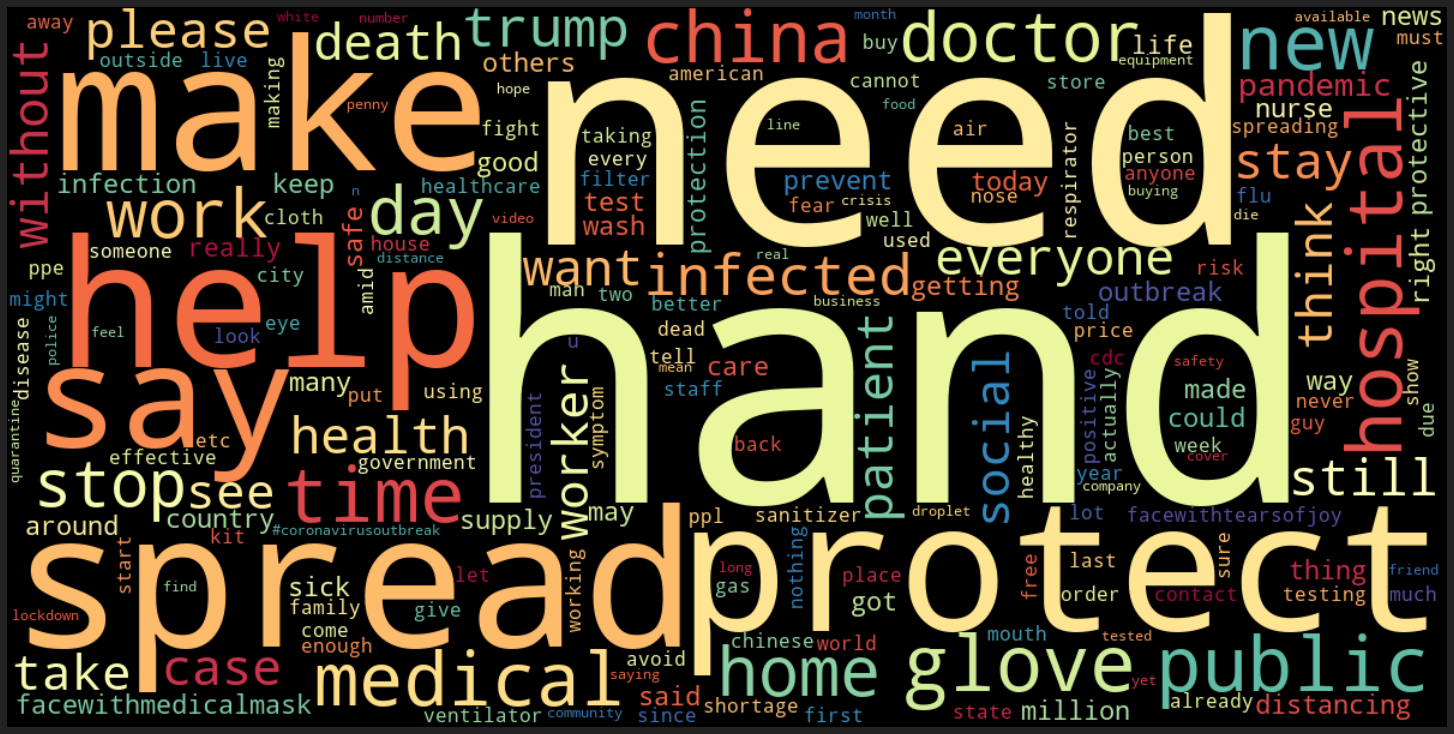

In [139]:
# Word cloud
word_dict = dict(Counter(all_words))
wordcloud = WordCloud(colormap='Spectral', width=1200, height=600).generate_from_frequencies(word_dict)

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# LDA Topic EDA

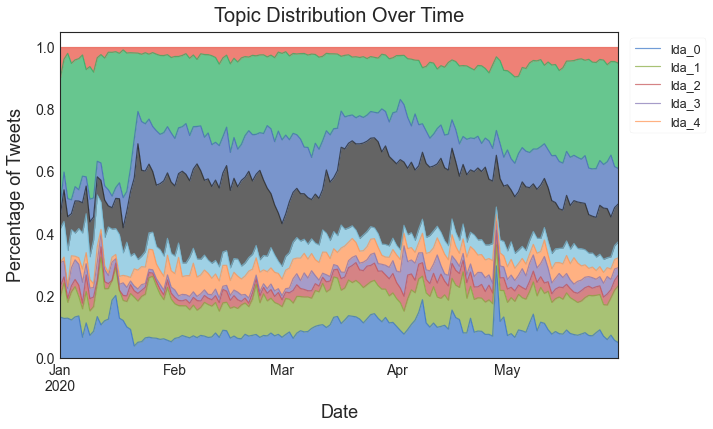

In [144]:
# LDA topic distribution over time
topics_over_time = df.groupby('date').lda.value_counts(normalize=True).unstack()

p1 = topics_over_time.plot.area(stacked = True, figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Topic Distribution Over Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Percentage of Tweets', fontsize=18, labelpad=10)
p1.legend(['lda_0', 'lda_1','lda_2', 'lda_3', 'lda_4'], facecolor='white',
          framealpha=1, bbox_to_anchor=(1.01, 1.0), loc='upper left')

# plt.savefig('Images/topic_distribution_over_time.png', dpi = 100)

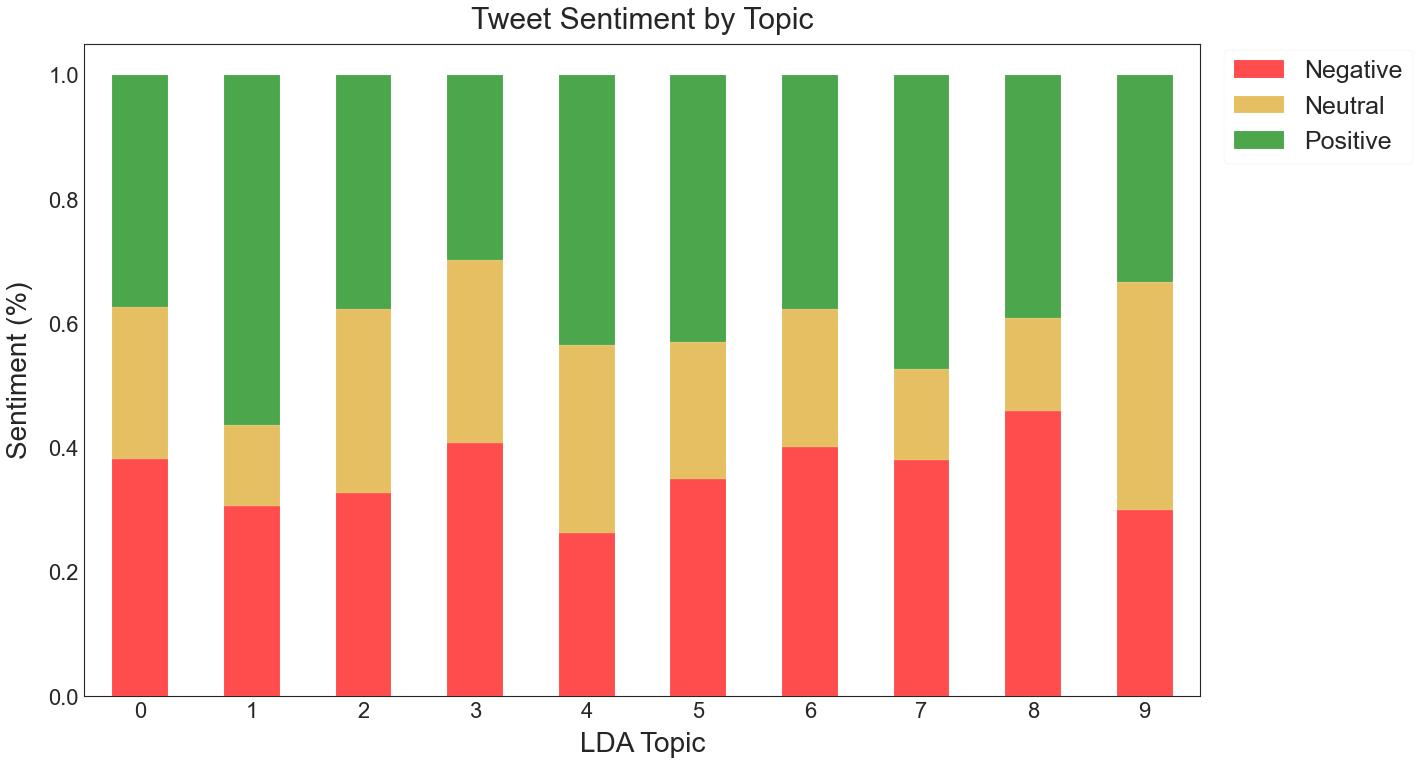

In [124]:
# Proportion of sentiment across lda topics
sent_by_lda = df.groupby('lda').sentiment.value_counts(normalize=True).unstack()

p1 = sent_by_lda.plot(kind='bar', stacked = True, figsize=(20,12), 
                       color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)
p1.set_title('Tweet Sentiment by Topic', fontsize=30, pad=15)
p1.set_xlabel('LDA Topic', fontsize=28, labelpad=10)
p1.set_ylabel('Sentiment (%)', fontsize=28, labelpad=15)
plt.setp(p1.get_xticklabels(), fontsize=22)
plt.setp(p1.get_yticklabels(), fontsize=22)
plt.setp(p1.xaxis.get_majorticklabels(), rotation=0)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1, bbox_to_anchor=(1.01, 1.01),
          fontsize=25)

# plt.savefig('Images/sentiment_by_topic.png', dpi = 100)

In [166]:
df[df['lda'] == 9]['sentiment'].value_counts()

neutral     8593
positive    7829
negative    7032
Name: sentiment, dtype: int64

In [58]:
# Create dataframes for positive, neutral and negative sentiment
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']
negative_df = df[df['sentiment'] == 'negative']

positive_df.shape, neutral_df.shape, negative_df.shape

((239200, 32), (115386, 32), (221363, 32))

In [143]:
# # Proportion of sentiments of top twenty tweets by day
# likes_dist = df.groupby('date')['nlikes'].value_counts(normalize=True).unstack()

# # Plot a stacked line graph
# p1 = likes_dist.plot.area(stacked = True, figsize=(10,6), alpha = .70, fontsize=14)

# p1.set_title('Likes Distribution of Top Twenty Tweets by Day', fontsize=20, pad=10)
# p1.set_xlabel('Date', fontsize=18, labelpad=10)
# p1.set_ylabel('Likes (%)', fontsize=18, labelpad=10)
# # p1.show()

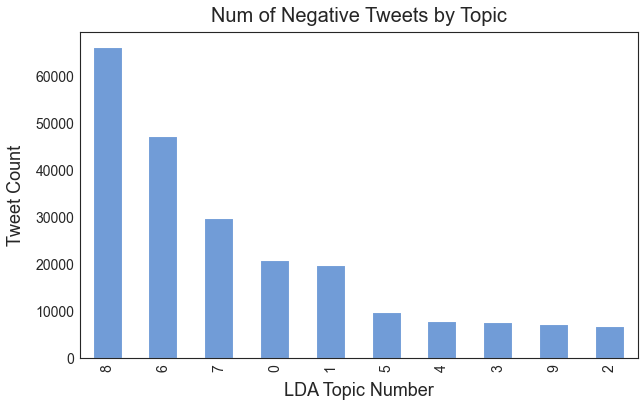

In [88]:
p1 = negative_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Negative Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

# plt.savefig('Images/tweet_count_by_topic_neg.png', dpi = 100)

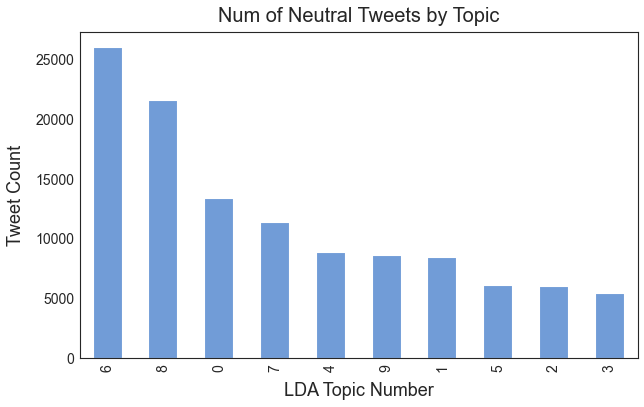

In [89]:
p1 = neutral_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Neutral Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

# plt.savefig('Images/tweet_count_by_topic_neu.png', dpi = 100)

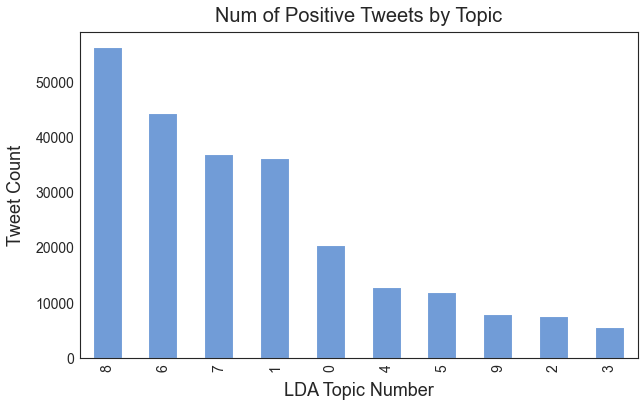

In [90]:
p1 = positive_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Positive Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

# plt.savefig('Images/tweet_count_by_topic_pos.png', dpi = 100)

# Subjectivity EDA

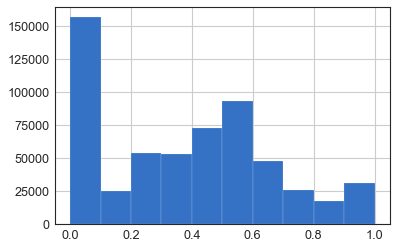

In [132]:
# Subjectivity score distribution
df['subjectivity_score'].hist()

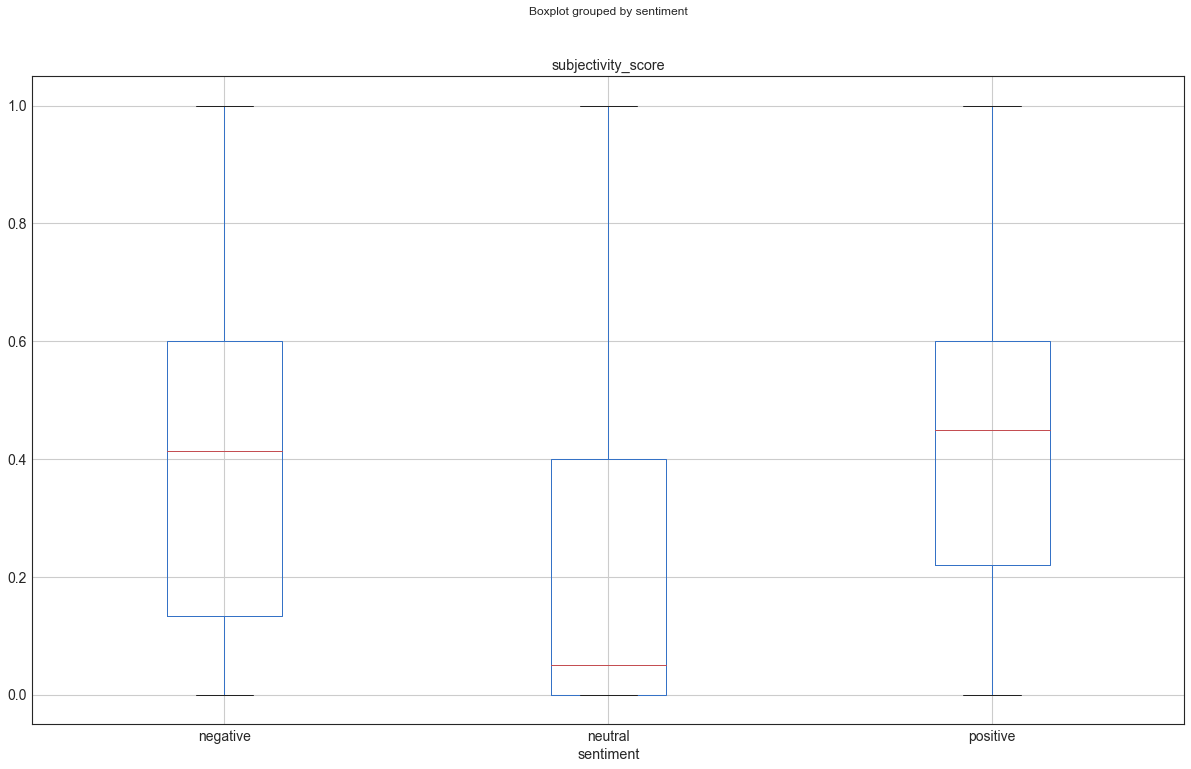

In [130]:
# Subjectivity score distribution by sentiment
df.boxplot('subjectivity_score', 'sentiment', figsize=(20,12), fontsize=14)

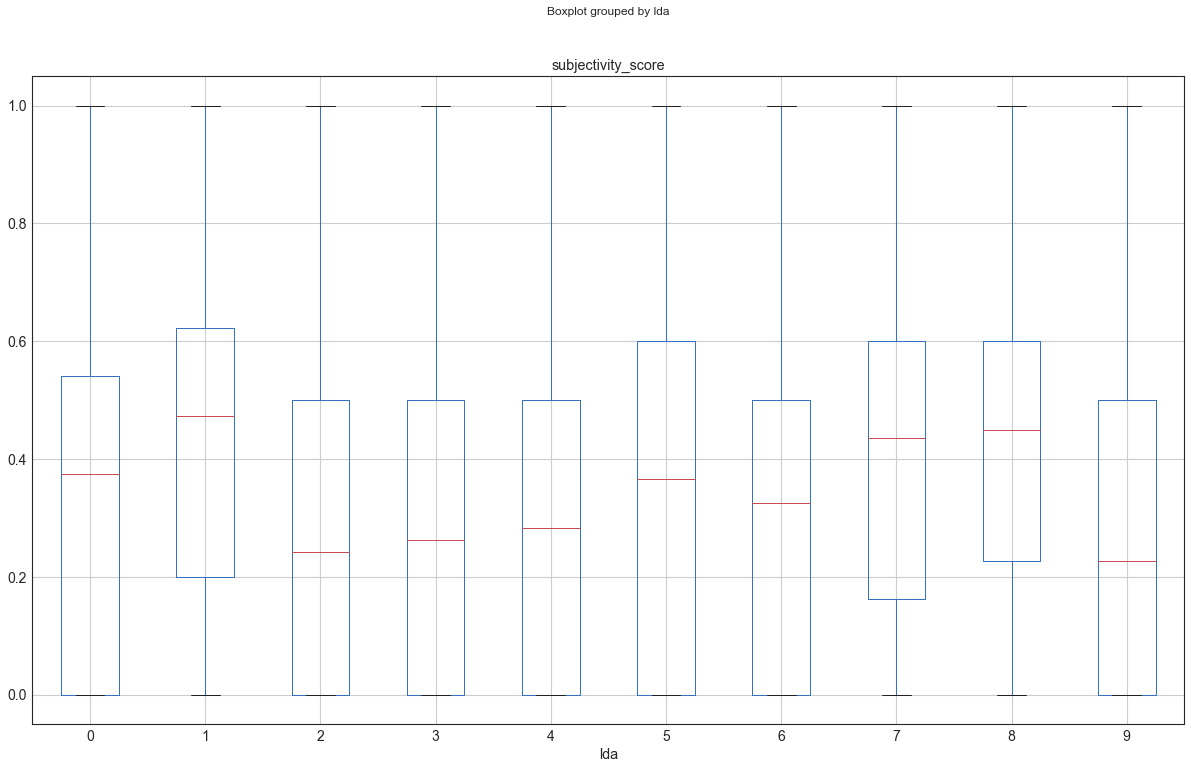

In [129]:
# Subjectivity score distribution by lda topic
df.boxplot('subjectivity_score', 'lda', figsize=(20,12), fontsize=14)

In [2]:
df = pd.read_csv('Datasets/jan_thru_mar_tweets_clean.csv')

In [3]:
df.shape

(3164798, 18)

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.groupby('date')['tweet'].count()

date
2020-01-01      7539
2020-01-02      8418
2020-01-03      8629
2020-01-04      9823
2020-01-05     12552
               ...  
2020-03-27     95848
2020-03-28     30665
2020-03-29    113435
2020-03-30    134480
2020-03-31    145200
Name: tweet, Length: 91, dtype: int64

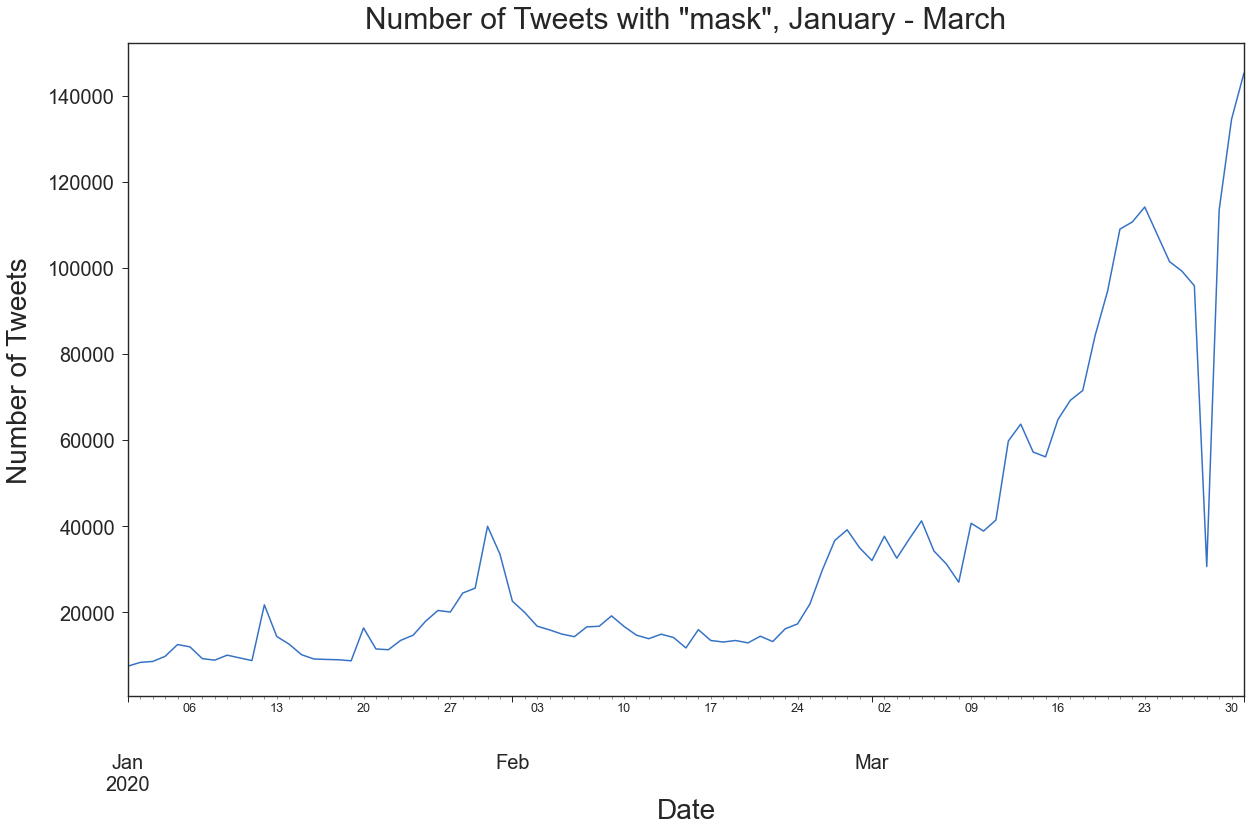

In [16]:
p1 = df.groupby('date')['tweet'].count().plot(figsize=(20,12))

p1.set_title('Number of Tweets with "mask", January - March', fontsize=30, pad=15)
p1.set_xlabel('Date', fontsize=28)
p1.set_ylabel('Number of Tweets', fontsize=28, labelpad=15)
plt.setp(p1.get_xticklabels(), fontsize=20)
plt.setp(p1.get_yticklabels(), fontsize=20);